**Importing the Dependencies**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

**Data Collection and Processing**

In [9]:
#loading the data from csv file to pandas dataframe
# big_mart_data = pd.read_csv("C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\big_sales_data_train.csv")

big_mart_data = pd.read_csv("big_sales_data_train.csv")

In [10]:
# first five rows from dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# number of data points (rows) and no. of featres (columns)
big_mart_data.shape

(8523, 12)

In [12]:
# getting information of data sets
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Colums:**

- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [13]:
# Checking missing values

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values:**

- Mean -----> average
- Mode -----> More repeated values

In [14]:
# mean value of Item_Weight
mean_weight = big_mart_data['Item_Weight'].mean()
print("Mean of Item_Weight = ",mean_weight)

Mean of Item_Weight =  12.857645184135976


In [15]:
# Filling the missing values in Item_Weight column with "Mean" value
big_mart_data['Item_Weight'].fillna(mean_weight, inplace=True)

In [16]:
# Re-Checking missing values

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
# mode of Outlet_Size column
big_mart_data['Outlet_Size'].mode()
# big_mart_data['Outlet_Size'].mode().values[0]

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
# mode of Outlet_Size column
mode_of_Outlet_Size = big_mart_data.pivot_table(values='Outlet_Size',
                                                columns='Outlet_Type',
                                                aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
missing_values_outlet_size = big_mart_data['Outlet_Size'].isnull()
print(missing_values_outlet_size)

# True means --> Null value
# False means ---> Not Null value

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [20]:
type(missing_values_outlet_size)

pandas.core.series.Series

In [21]:
#missing_values_outlet_size[3]
missing_values_outlet_size[0:10]

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
9     True
Name: Outlet_Size, dtype: bool

In [22]:
big_mart_data.loc[0:3, ["Item_Identifier","Outlet_Size"]]

,Item_Identifier,Outlet_Size
0,FDA15,Medium
1,DRC01,Medium
2,FDN15,Medium
3,FDX07,NaN


In [23]:
# Filling the missing values in Outlet_Size column with "Mode" value

big_mart_data.loc[missing_values_outlet_size,'Outlet_Size'] = big_mart_data.loc[missing_values_outlet_size,'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size[x])

In [24]:
#Re-checking missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Data Analysis**

In [25]:
sns.set()

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1330319193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


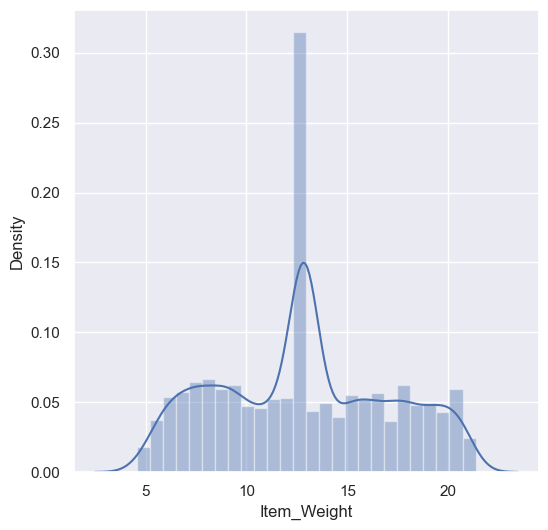

In [26]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

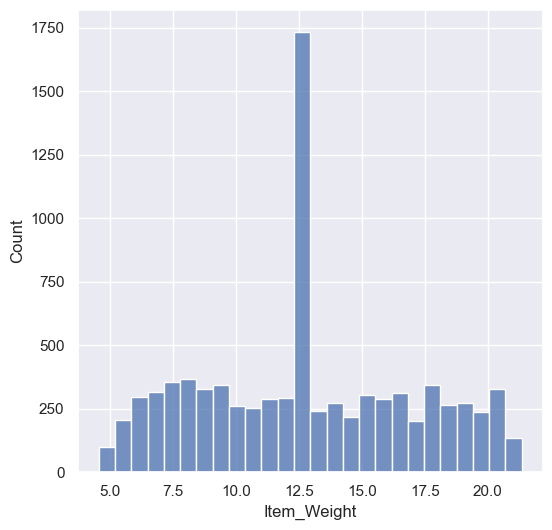

In [27]:
# Item_Weight histogram
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Weight'])
plt.show()

In [28]:
big_mart_data['Item_Weight'].value_counts()

Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: count, Length: 416, dtype: int64

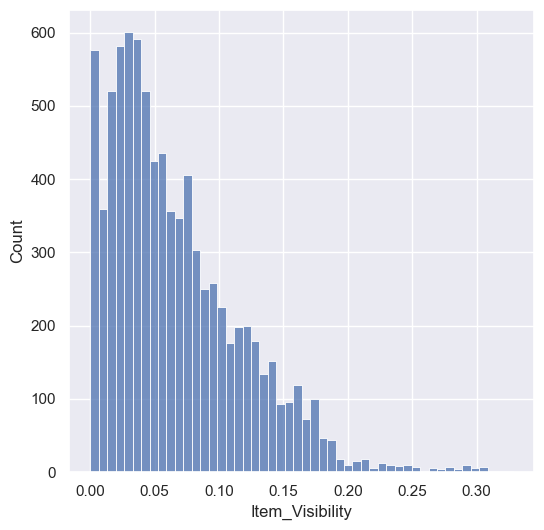

In [29]:
# Item_Visibility histogram
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()

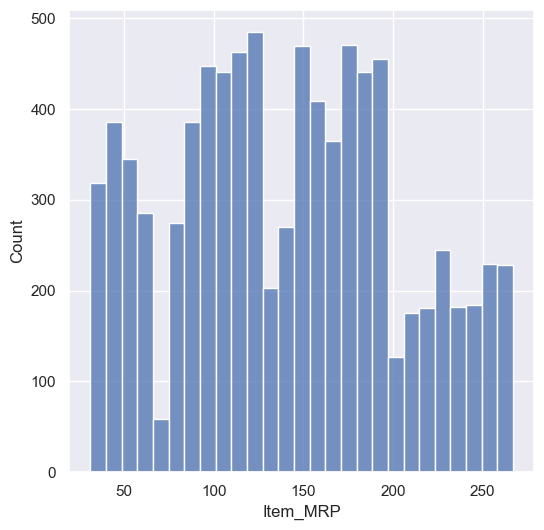

In [30]:
# Item_MRP histogram
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

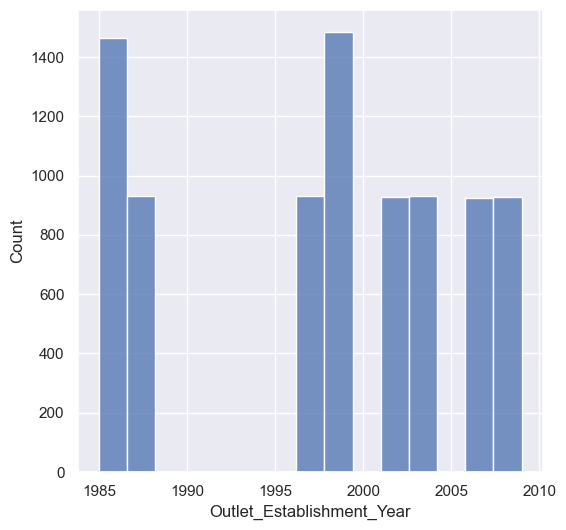

In [31]:
# Outlet_Establishment_Year histogram
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Outlet_Establishment_Year'])
plt.show()


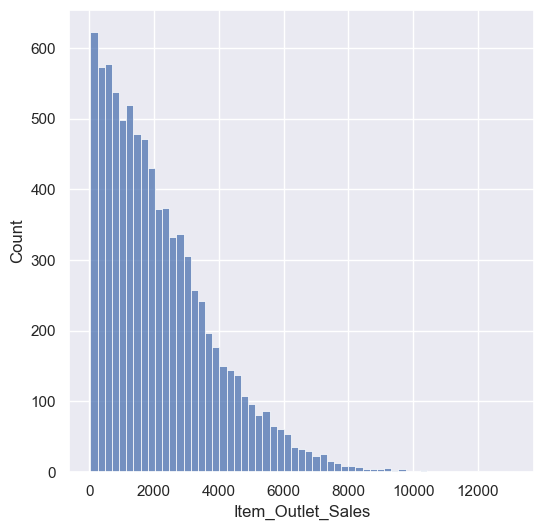

In [32]:
# Item_Outlet_Sales histogram
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()


In [33]:
big_mart_data['Item_Outlet_Sales'].value_counts()

Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: count, Length: 3493, dtype: int64

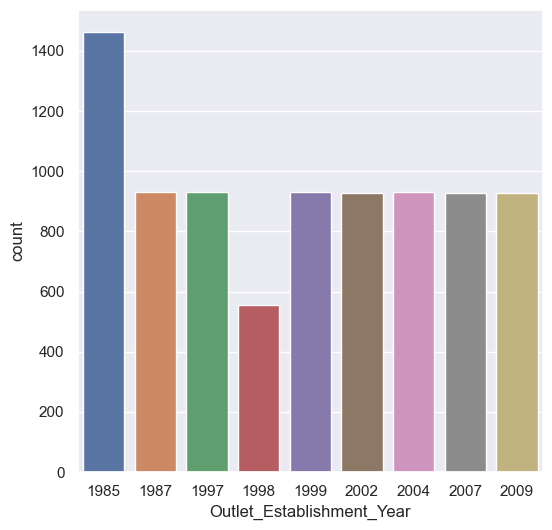

In [34]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data= big_mart_data)
plt.show()

In [35]:
big_mart_data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

*Categorical Features (Columns)*

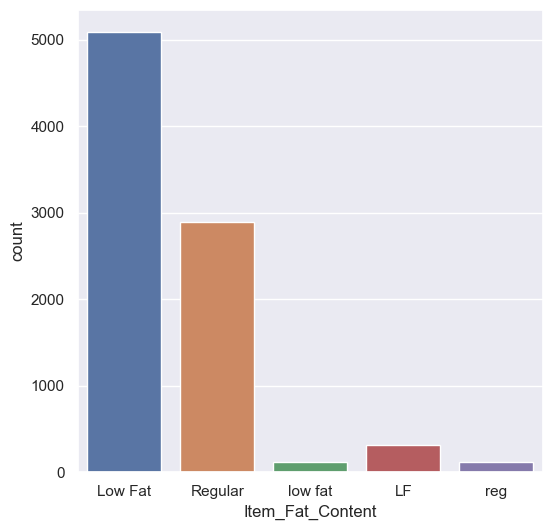

In [36]:
# Item_Identifier column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data= big_mart_data)
plt.show()

In [37]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

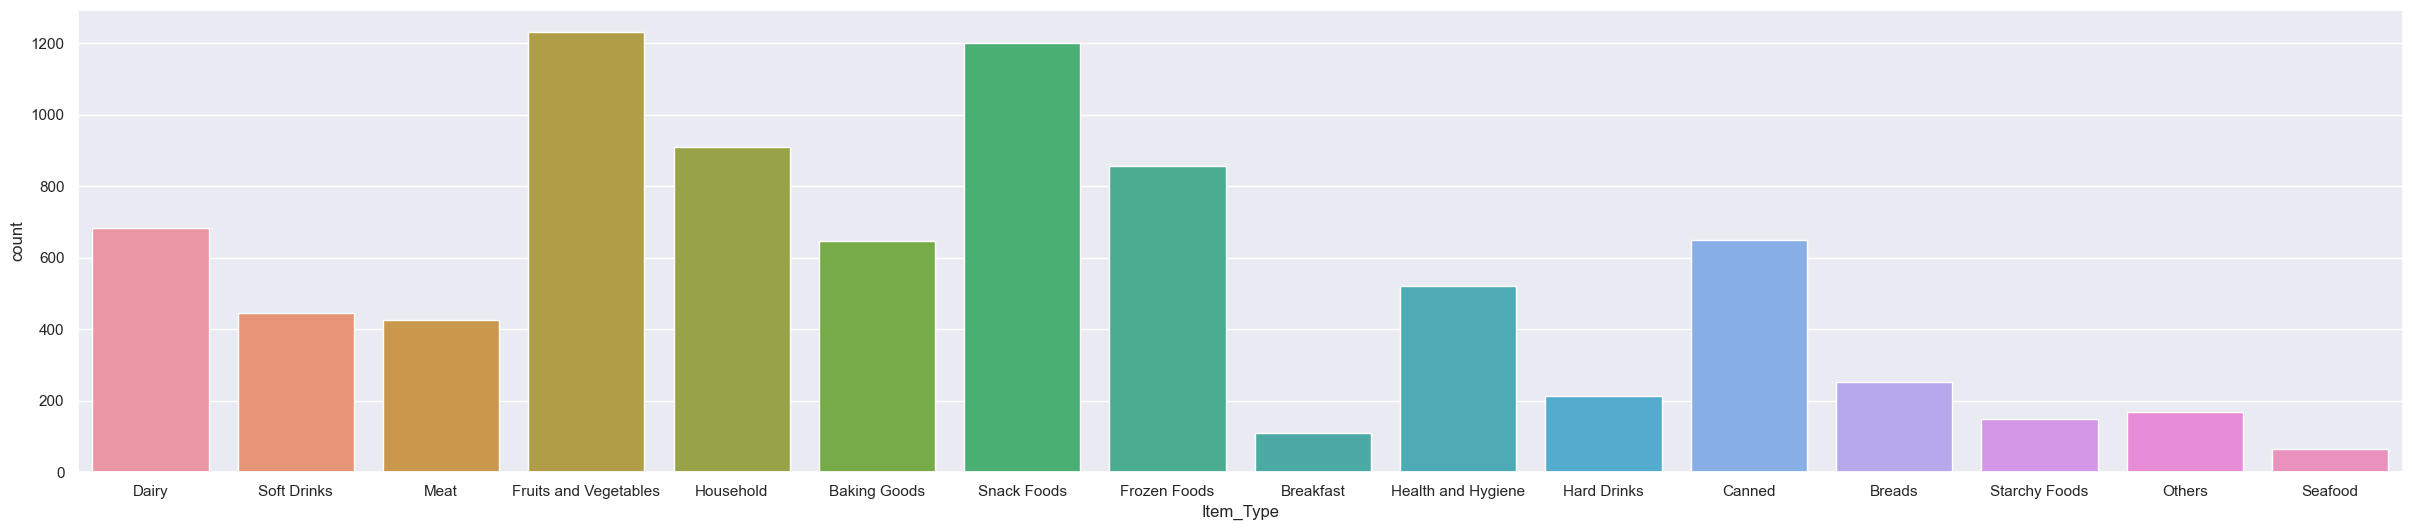

In [38]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data= big_mart_data)
plt.show()


In [39]:
big_mart_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

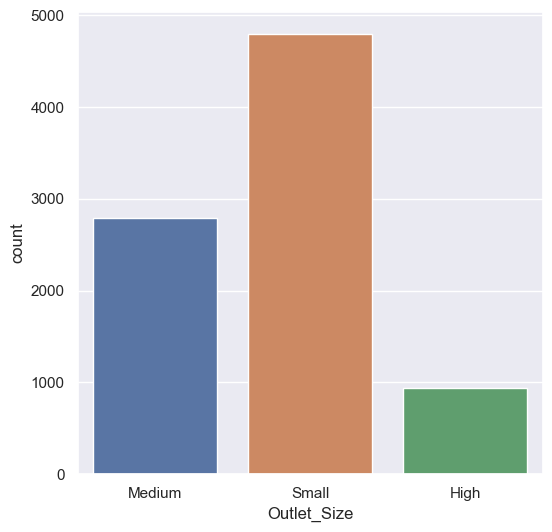

In [40]:
# Item_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data= big_mart_data)
plt.show()

In [41]:
big_mart_data['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

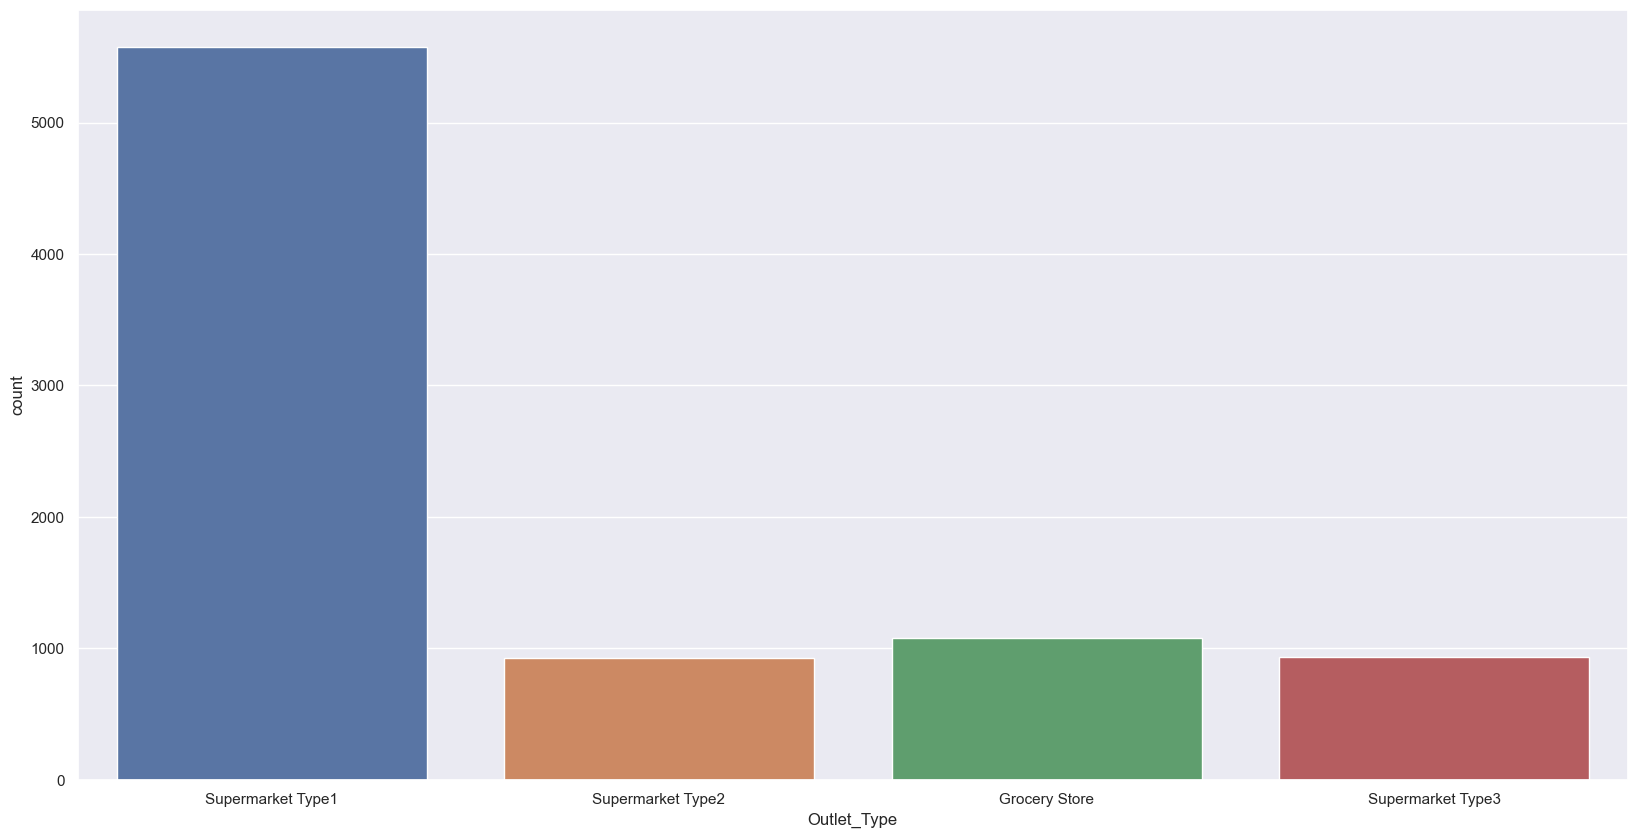

In [42]:
# Outlet_Type column
plt.figure(figsize=(20,10))
sns.countplot(x='Outlet_Type', data= big_mart_data)
plt.show()


In [43]:
big_mart_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

**Data Pre-Processing**

In [44]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [46]:
big_mart_data.replace({'Item_Fat_Content': {'low fat' : 'Low Fat' , 'LF' : 'Low Fat', 'reg' : 'Regular'}},
                      inplace=True)

In [47]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**Label Encoding**

In [48]:
encoder = LabelEncoder()

In [49]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])




In [50]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,156,0.016047,156,249.8092,156,1999,156,156,156,3735.1380
1,8,5.92,8,0.019278,8,48.2692,8,2009,8,8,8,443.4228
2,662,17.50,662,0.016760,662,141.6180,662,1999,662,662,662,2097.2700
3,1121,19.20,1121,0.000000,1121,182.0950,1121,1998,1121,1121,1121,732.3800
4,1297,8.93,1297,0.000000,1297,53.8614,1297,1987,1297,1297,1297,994.7052


**Spliting Features and Target**

In [51]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [52]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300               156         0.016047   
1                   8        5.920                 8         0.019278   
2                 662       17.500               662         0.016760   
3                1121       19.200              1121         0.000000   
4                1297        8.930              1297         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865               370         0.056783   
8519              897        8.380               897         0.046982   
8520             1357       10.600              1357         0.035186   
8521              681        7.210               681         0.145221   
8522               50       14.800                50         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0           156  249.8092                156    

In [53]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**Splitting the data into Training Data and Testing Data**

In [54]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [55]:
print(X.shape, X_Train.shape, X_Test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [56]:
print(Y.shape, Y_Train.shape, Y_Test.shape)

(8523,) (6818,) (1705,)


**Machine Learing Model Training**

XGBoost Regressor

In [57]:
regressor  = XGBRegressor()

In [58]:
regressor.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [59]:
# prediction of training data
training_data_prediction = regressor.predict(X_Train)

In [60]:
training_data_prediction

array([2059.411 , 2415.311 , 3565.5212, ..., 2999.232 , 1634.2147,
       2231.0112], dtype=float32)

In [61]:
# R squared value
r2_train = metrics.r2_score(Y_Train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8087298953960846


In [62]:
# Prediction of test data
test_data_prediction = regressor.predict(X_Test)

In [63]:
test_data_prediction

array([2126.1675, 2523.356 , 1792.0364, ..., 2053.2356, 2904.3896,
       4277.145 ], dtype=float32)

In [64]:
# R squared value of test data
r2_test = metrics.r2_score(Y_Test, test_data_prediction)
print('R Squared value test data = ', r2_test)

R Squared value test data =  0.36764315656862434


In [65]:
import pickle

In [66]:
pickle.dump(regressor, open('big_mart_data_model_saved', 'wb'))

In [67]:
model_loaded = pickle.load(open('big_mart_data_model_saved', 'rb'))

In [68]:
model_loaded.predict(X_Test)

array([2126.1675, 2523.356 , 1792.0364, ..., 2053.2356, 2904.3896,
       4277.145 ], dtype=float32)